In [1]:
%matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt


sigmay = 2.3 
p = 5 
mu = 17.0  
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0]) 
qpo_cent = np.array([1.0/5.0, 1.0/25.0]) 
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) 
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs)

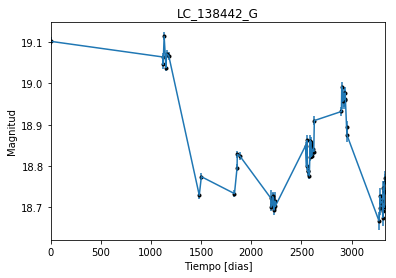

In [3]:
data = np.genfromtxt('LC_138442_G.dat')
juldate = data[:,0]  
t = juldate - juldate.min()  
y = data[:,1]  
yerr = data[:,2]  

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('LC_138442_G')
plt.savefig("LC_138442_G.pdf")

In [4]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [5]:
%%capture capt
sample = model.run_mcmc(20000)

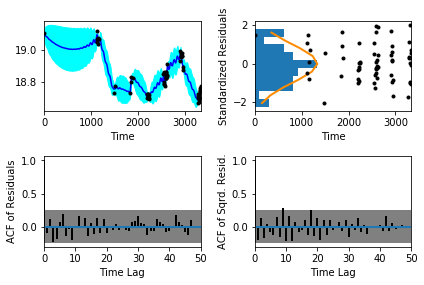

In [6]:
sample.assess_fit()

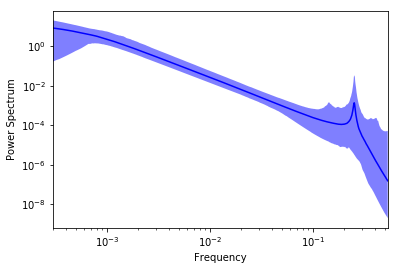

In [7]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

In [8]:
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)

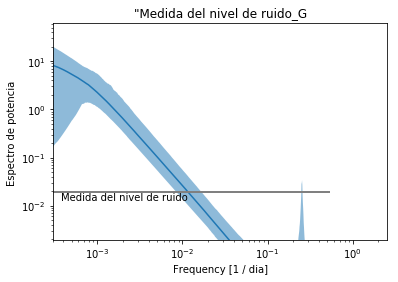

In [9]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia ')
plt.xlabel('Frequency [1 / dia]')
plt.annotate("Medida del nivel de ruido", (1.25 * plt.xlim()[0], noise_level / 1.5))
plt.title('LC_138442_G')
plt.title('"Medida del nivel de ruido_G')
plt.savefig("Medida del nivel de ruido_G.pdf")

Text(0.5,1,'Prediccion , valor esperado LC_138442_G')

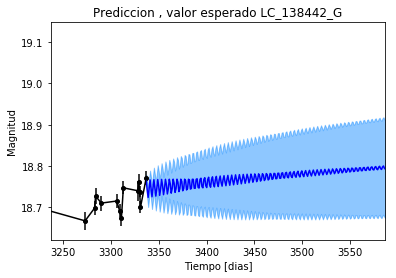

In [10]:
tpredict = t.max() + np.linspace(0.0, 250.0, 250)
ypredict, yp_var = sample.predict(tpredict)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tpredict, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tpredict, ypredict, 'b-')
plt.xlim(tpredict.min() - 100, tpredict.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('Prediccion , valor esperado LC_138442_G')

Text(0.5,1,'Prediccion, Caminos simulados  LC_138442_G')

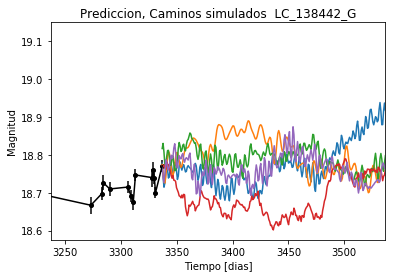

In [12]:
tpredict = t.max() + np.linspace(0.0, 200.0, 250)
npaths = 5
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
for i in range(npaths):
    ysim = sample.simulate(tpredict, bestfit='random')  
    plt.plot(tpredict, ysim)
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.xlim(tpredict.min()-100, tpredict.max())
plt.title('Prediccion, Caminos simulados  LC_138442_G')

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


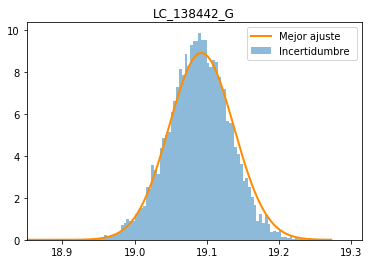

In [13]:
tpredict = 10.0
nsim = 10000
ysim = np.zeros(nsim)
for i in range(nsim):
    ysim[i] = sample.simulate(tpredict, bestfit='random')
yhat, yhvar = sample.predict(tpredict)
plt.hist(ysim, bins=100, alpha=0.5, histtype='stepfilled', normed=True, label='Incertidumbre ')
ymin, ymax = plt.xlim()
ygrid = np.linspace(ymin, ymax, 200)
predictive_pdf = 1.0 / np.sqrt(2.0 * np.pi * yhvar) * np.exp(-0.5 * (ygrid - yhat) ** 2 / yhvar)
plt.plot(ygrid, predictive_pdf, color='DarkOrange', lw=2, label='Mejor ajuste ')
plt.xlim(ymin, ymax + 0.1 * (ymax - ymin))
plt.legend(loc='upper right')
plt.title('LC_138442_G')
plt.savefig("Mejor_ajuste_LC_138442_G.pdf")

Text(0.5,1,'Interpolacion, camino simulado LC_138442_G')

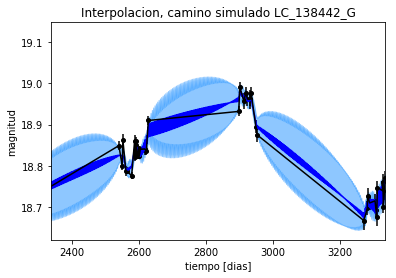

In [14]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_138442_G')

Text(0.5,1,'Interpolacion, camino simulado LC_138442_G')

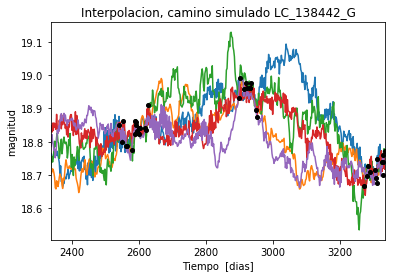

In [15]:
npaths = 5
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_138442_G')

In [16]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

In [17]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 192.561824557
Median: 0.00601337567212
Standard deviation: 0.0926027506666
68% credibility interval: [ 0.00126438  0.0271242 ]
95% credibility interval: [ 0.00040162  0.25639709]
99% credibility interval: [  3.17704660e-04   7.71124210e-01]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 720.416084726
Median: 0.00582968397805
Standard deviation: 0.0672585076542
68% credibility interval: [ 0.00120241  0.02551684]
95% credibility interval: [ 0.00037819  0.17548516]
99% credibility interval: [  3.17704660e-04   4.90855580e-01]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 246.763798138
Median: 0.120961245839
Standard deviation

In [18]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 423.828529598
Median: 149.906769515
Standard deviation: 2.9182058012
68% credibility interval: [ 146.49414345  152.33092095]
95% credibility interval: [ 142.85292277  153.80217143]
99% credibility interval: [ 140.66488703  154.33176387]


In [19]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 212.892108367
Median: 0.943961802668
Standard deviation: 1.92916059286
68% credibility interval: [ 0.26670519  3.49427951]
95% credibility interval: [ 0.08870126  6.6754135 ]
99% credibility interval: [ 0.05313091  9.87439014]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 99.3294679245
Median: 2.63759170408
Standard deviation: 8.90888304423
68% credibility interval: [  2.45881642  16.25078729]
95% credibility interval: [  1.00249224  

In [20]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 15520.7302824
Median: 1.94612688968e-35
Standard deviation: 2.62681436667e+146
68% credibility interval: [  3.98835247e-059   1.68775222e+123]
95% credibility interval: [  1.39675068e-069   2.71309564e+142]
99% credibility interval: [  2.52139070e-115   1.97889450e+143]


In [21]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 619.955365128
Median: 18.8730179699
Standard deviation: 0.066604447144
68% credibility interval: [ 18.81912617  18.94397906]
95% credibility interval: [ 18.75906218  19.02502321]
99% credibility interval: [ 18.70070997  19.07948351]


In [22]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 117.631622827
Median: 0.253911889897
Standard deviation: 0.199028890157
68% credibility interval: [ 0.24265891  0.50542875]
95% credibility interval: [ 0.11477679  0.82551389]
99% credibility interval: [ 0.          0.97850556]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 117.631622827
Median: 0.253911889897
Standard deviation: 0.199028890157
68% credibility interval: [ 0.24265891  0.50542875]
95% credibility interval: [ 0.11477679  0.82551389]
99% credibility interval: [ 0.          0.97850556]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 394.578813452
Median: 0.0
Standard deviation: 0.000337343584455
68% cred

In [23]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 423.828529598
Median: 149.906769515
Standard deviation: 2.9182058012
68% credibility interval: [ 146.49414345  152.33092095]
95% credibility interval: [ 142.85292277  153.80217143]
99% credibility interval: [ 140.66488703  154.33176387]


In [24]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 593.716261564
Median: 0.0176993342442
Standard deviation: 0.0097977515707
68% credibility interval: [ 0.01186009  0.02608812]
95% credibility interval: [ 0.0084546   0.03804804]
99% credibility interval: [ 0.006396    0.04835275]


In [25]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 534.501475112
Median: 1.02280068781
Standard deviation: 0.219710404083
68% credibility interval: [ 0.84730056  1.2646092 ]
95% credibility interval: [ 0.72244887  1.57883882]
99% credibility interval: [ 0.64444725  1.80507671]


In [26]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 341.565942772
Median: 0.0191466326844
Standard deviation: 0.245627662939
68% credibility interval: [  9.36965998e-125   1.44183316e-001]
95% credibility interval: [  9.60397683e-145   7.91294435e-001]
99% credibility interval: [  1.16394274e-145   1.45359348e+000]


In [27]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 192.561824557
Median: (-0.0377831536696-0.919831925065j)
Standard deviation: 1.37926677991
68% credibility interval: [-0.17042636-1.32324313j -0.00794436-1.58283898j]
95% credibility interval: [-1.61099041-0.04541335j -0.00252346-1.59014253j]
99% credibility interval: [ -4.84511631e+00+0.j          -1.99619725e-03-1.59138358j]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 720.416084726
Median: (-0.0366289847164+4.70629335356j)
Standard deviation: 1.32001044341
68% credibility interval: [-0.16032705+1.30616527j -0.00755496+1.57828692j]
95% credibility interval: [-1.10260579+0.52637454j -0.00237625+0.j        ]
99% credibility interval: [ -3.08413657e+00+0.j          -1.99619725e-03+1.59138358j]
Posterior summary for p